In [1]:
import gym
import pybulletgym
import ray
from ray import tune
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.sac import SACTrainer
from matplotlib import pyplot as plt
from IPython import display

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#ray.shutdown()
ray.init(ignore_reinit_error=True)


ENV = 'HumanoidMuJoCoEnv-v0'
def make_env(env_config):
    import pybulletgym
    return gym.make(ENV)
tune.register_env(ENV, make_env)
env = gym.make(ENV)

config = {
    "env": ENV,
}

2021-05-31 11:48:48,787	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265


WalkerBase::__init__


C:\Python37\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Reward: 2163.79222032372


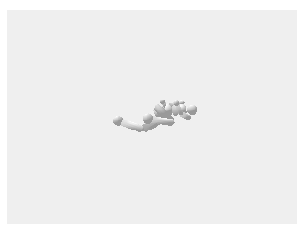

In [3]:
checkpoint_path = r'C:\Users\34685\Desktop\TFG\ray-results-cte\trained-agents\HumanoidMujocoEnv-v0\sac-agent\checkpoint_1340\checkpoint-1340'
agent = SACTrainer(config)
agent.restore(checkpoint_path)


def watch_agent(env):
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action=agent.compute_action(state)

    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

watch_agent(env)
